<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
#ваш код здесь
# Файлы dst-3.0_16_1_hh_database.csv и EchangeRates.csv необходимо 
# разместить в той же директории, что и данный ноутбук.
# Данные файлы доступны для скачивания с Гугл.Диска:
# https://drive.google.com/drive/folders/1qhYoM0WHSgSRpMofyB8EjdPal_NIXjCf
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
#ваш код здесь
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
#ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [5]:
#ваш код здесь
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
#ваш код здесь
def parse_education(val: str):
    val = ' '.join(val.split()[:2])
    if 'Высшее' in val:
        return 'высшее'
    elif 'Неоконченное высшее' in val:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in val:
        return 'среднее специальное'
    elif 'Среднее образование' in val:
        return 'среднее'

df['Образование'] = df['Образование и ВУЗ'].apply(parse_education)

print(df['Образование'].value_counts())

middle_education_count = df['Образование'].value_counts()['среднее']
print(f'Сколько соискателей имеет средний уровень образования (школьное образование): {middle_education_count}')

df.drop(columns='Образование и ВУЗ', inplace=True)

Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64
Сколько соискателей имеет средний уровень образования (школьное образование): 559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
#ваш код здесь
# Создадим из признака "Пол, возраст" два отдельных
df[['Пол', 'Возраст']] = df['Пол, возраст'].str.split(',', n=1, expand=True)

# Удалим лишние пробельные символы
df['Пол'] = df['Пол'].str.strip()
df['Возраст'] = df['Возраст'].str.strip()

# Заменим развёрнутое наименование пола на одну букву
df['Пол'] = df['Пол'].str[0]

# Конвертируем возраст в целое
df['Возраст'] = df['Возраст'].str.extract('(\d+)').astype(int)

df.drop(columns='Пол, возраст', inplace=True)

# Проверим, что всё получилось корректно
print('Уникальные значения признака "Пол":', df['Пол'].unique())
print('Уникальные значения признака "Возраст":', df['Возраст'].unique())

# Посчитаем долю женских резюме
female_pct = round(len(df[df['Пол'] == 'Ж']) / len(df) * 100, 2)
print(f'Доля женских резюме: {female_pct}%')

# Посчитаем средний возраст
mean_age = round(df['Возраст'].mean(), 1)
print(f'Средний возраст соискателей:', mean_age)

Уникальные значения признака "Пол": ['М' 'Ж']
Уникальные значения признака "Возраст": [ 39  60  36  38  26  29  46  34  35  59  27  21  31  37  30  33  42  32
  23  28  25  24  43  53  49  44  48  54  22  20  40  62  72  45  41  61
  50  58  57  52  56  18  19  51  16  47  71  63  55  64  68  17  73  66
  65  77  67  69  76  70  14  15 100]
Доля женских резюме: 19.07%
Средний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
#ваш код здесь
def parse_experience(val):
    if val is np.nan or val == 'Не указано':
        return
    # выкинем не интересную нам информацию о местах работы
    val = val.split(',', 1)[0]
    # возьмём интересующие нас слова с длительностью (опустим "Опыт работы")
    words = val.split()[2:6]
    # далее рассчитаем опыт в месяцах
    experience = 0
    year_units = ('год', 'года', 'лет')
    month_units = ('месяц', 'месяца', 'месяцев')
    for units_index in range(1, len(words), 2):
        units = words[units_index]
        duration = words[units_index-1]
        if units in year_units:
            experience += 12 * int(duration)
        elif units in month_units:
            experience += int(duration)
    return experience

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(parse_experience)

df.drop(columns='Опыт работы', inplace=True)

# Посчитаем медиану опыта работы
median_experience = df['Опыт работы (месяц)'].median()
print(f"Медиана опыта работы: {median_experience} мес.")

Медиана опыта работы: 100.0 мес.


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
#ваш код здесь
# Города-миллионники
million_cities = [
    'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
    'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
    'Красноярск', 'Пермь', 'Воронеж', 'Волгоград',
]

def parse_city(val: str):
    """Определение города"""
    val = val.split(',', 1)[0].strip()
    if val in ('Москва', 'Санкт-Петербург'):
        return val
    elif val in million_cities:
        return 'город-миллионник'
    return 'другие'

def parse_relocation_readiness(val: str):
    """Определение готовности к переезду"""
    return 'не готов к переезду' not in val and 'не готова к переезду' not in val

business_trips_readiness_regex = re.compile(r'(?:не )?готова? к(?: редким)? командировкам')

def parse_business_trips_readiness(val: str):
    """Определение готовности к командировкам"""
    match = business_trips_readiness_regex.search(val)
    return bool(match and not match.group(0).startswith('не'))

# Создадим отдельные признаки "Город", "Готовность к переезду", "Готовность к командировкам"
df['Город'] = df['Город, переезд, командировки'].apply(parse_city)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(parse_relocation_readiness)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(parse_business_trips_readiness)

df.drop(columns='Город, переезд, командировки', inplace=True)

# Посмотрим, что получилось для проверки результатов
print(df['Город'].value_counts())
print(df['Готовность к переезду'].value_counts())
print(df['Готовность к командировкам'].value_counts())
print(df[['Город', 'Готовность к переезду', 'Готовность к командировкам']].head())

# Посчитаем, сколько живёт в Санкт-Петербурге в процентах
sbp_pct = round(len(df[df['Город'] == 'Санкт-Петербург']) / len(df) * 100)
print(f'Живут в Санкт-Петербурге: {sbp_pct}%')

# Посчитаем, сколько одновременно готовы и к переездам и к командировкам в процентах
ready_to_move_and_travel_share = round(len(
    df[df['Готовность к переезду'] 
       & df['Готовность к командировкам']]
) / len(df) * 100)
print(f'Готовы и к переездам и к командировкам: {ready_to_move_and_travel_share}%')

Город
Москва              16621
другие              15854
город-миллионник     7332
Санкт-Петербург      4937
Name: count, dtype: int64
Готовность к переезду
False    28719
True     16025
Name: count, dtype: int64
Готовность к командировкам
True     31640
False    13104
Name: count, dtype: int64
    Город  Готовность к переезду  Готовность к командировкам
0  другие                  False                       False
1  другие                  False                        True
2  другие                  False                       False
3  другие                  False                        True
4  Москва                  False                        True
Живут в Санкт-Петербурге: 11%
Готовы и к переездам и к командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
#ваш код здесь
# Преобразуем категориальные признаки "Занятость" и "График" методом "One Hot Encoding"
for column in ['Занятость', 'График']:
    df = df.join(df[column].str.get_dummies(sep=', ').astype(bool))

# Посчитаем, сколько людей ищут и проектную работу и волонтёрство
project_and_volunteer_count = len(df[df['проектная работа'] & df['волонтерство']])
print(f"Ищут и проектную работу и волонтёрство: {project_and_volunteer_count}")

# Посчитаем, сколько людей хотят работать и вахтовым методом и с гибким графиком
shift_flexible = len(df[df['вахтовый метод'] & df['гибкий график']])
print(f'Хотят работать и вахтовым методом и с гибким графиком: {shift_flexible}')

# Удаление признаков "Занятость" и "График" из таблицы
df.drop(columns='Занятость', inplace=True)
df.drop(columns='График', inplace=True)

Ищут и проектную работу и волонтёрство: 436
Хотят работать и вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
df.head()

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,волонтерство,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,False,True,True,False,True,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,...,False,True,True,False,True,False,True,True,True,True
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,...,False,True,False,False,False,False,False,True,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,...,False,True,True,False,True,False,True,False,False,True
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,...,False,True,False,False,False,False,False,True,False,False


In [12]:
#ваш код здесь
def parse_wage_value(val):
    """Парсинг значения (цифры) зарплаты"""
    return float(val.split( )[0])

currency_to_iso = {
    'USD': 'USD',
    'KZT': 'KZT',
    'грн': 'UAH',
    'белруб': 'BYN',
    'EUR': 'EUR',
    'KGS': 'KGS',
    'сум': 'UZS',
    'AZN': 'AZN',
    'руб': 'RUB',
}

def parse_wage_currency(val):
    """Парсинг валюты зарплаты"""
    currency = val.split( )[1].replace('.', '')
    return currency_to_iso[currency]

# Загрузка данных из файла ExchangeRates.csv
exchange_rates_df = pd.read_csv('ExchangeRates.csv')

# Выбор нужных колонок
exchange_rates_df = exchange_rates_df[['currency', 'date', 'proportion', 'close']]

# Конвертируем интересующие нас признаки "Обновление резюме" и "date" в datetime.date
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], dayfirst=True).dt.date

df['Значение ЗП'] = df['ЗП'].apply(parse_wage_value)
df['Валюта ЗП'] = df['ЗП'].apply(parse_wage_currency)

# Объединим данные по резюме и по валютным курсам
merged = df.merge(
    exchange_rates_df,
    left_on=['Валюта ЗП', 'Обновление резюме'],
    right_on=['currency', 'date',],
    how='left',
)

# Заполним пропуски курсов валют единицей (предположим, что не указывали рубли)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)

# Создадим новый признак ЗП (руб), содержащий желаемую ЗП в виде числа в рублях
df['ЗП (руб)'] = merged['close'] * merged['Значение ЗП'] / merged['proportion']

# Удалим больше не нужные колонки
df.drop(columns=['ЗП', 'Значение ЗП', 'Валюта ЗП'], inplace=True)

# Посчитаем медианную зарплату соискателей в рублях
median_wage = round(df['ЗП (руб)'].median() / 1000)
print(f'Медианная зарплата: {median_wage} тыс. руб.')

Медианная зарплата: 59 тыс. руб.


/tmp/ipykernel_10863/3064264879.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], dayfirst=True).dt.date


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

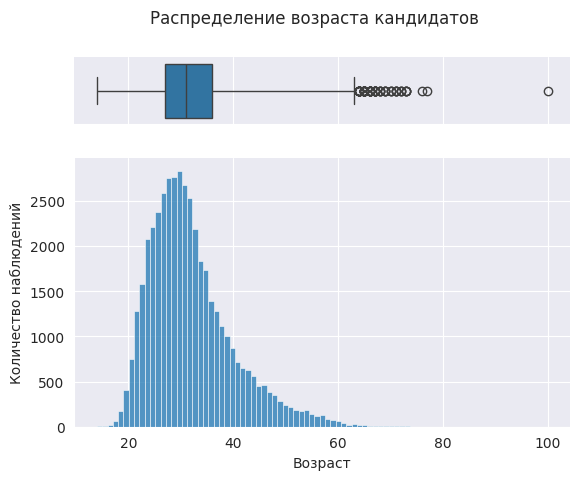

Мода возраста: 30 лет
Другие статистики возраста:
count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64
Возраст большинства (1std от среднего) лежит в интервале между 24 и 40 годами
Кандидатов моложе 18ти лет: 21
Кандидатов старше 80ти лет: 1


In [13]:
# ваш код здесь
# Создадим визуализацию
fig, (ax_box, ax_hist) = plt.subplots(
    2,
    sharex=True, 
    gridspec_kw={'height_ratios': (0.20, 0.80)},
)
sns.boxplot(x=df['Возраст'], ax=ax_box, whis=3)  
sns.histplot(x=df['Возраст'], bins=85, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.ylabel('Количество наблюдений')
fig.suptitle('Распределение возраста кандидатов')
plt.show()

# Посчитаем моду возраста
age_mode = df['Возраст'].mode()[0]
print(f'Мода возраста: {age_mode} лет')

print('Другие статистики возраста:', df['Возраст'].describe(), sep='\n')

# Посчитаем интервал, в котором лежит возраст большинства соискателей
age_std = df['Возраст'].std()
print(f'Возраст большинства (1std от среднего) лежит в интервале между {round(mean_age - age_std)} и {round(mean_age + age_std)} годами')

# Посчитаем, сколько слишком юных или пожилых кандидатов
# IQR для поиска аномалий тут использовать нецелесообразно, поскольку мы имеем
# соответствующее представление о сути величины, которую анализируем
likely_too_young_count = len(df[df['Возраст'] < 18])
likely_too_old_count = len(df[df['Возраст'] > 80])
print('Кандидатов моложе 18ти лет:', likely_too_young_count)
print('Кандидатов старше 80ти лет:', likely_too_old_count)

Основные статистики возраста кандидатов показаны в выводе выше под диаграммой. Мода 30, среднее примерно 32, предельные значения: 14 лет (минимум) и 100 лет(максимум). Аномальным тут выглядит максимум (100 лет), в таком возрасте скорее всего весьма непросто работать и, тем более, искать работу на сайте.
Выводы по диаграмме:
- Распределение, которое можем видеть на гистограмме ожидаемо напоминает нормальное с более вытянутым "хвостом" справа. Такая его форма хорошо объясняется сутью явления (слишком юным работать нельзя по закону, в то же время, это можно делать до глубокой старости).
- Наибольшая плотность ожидаемо приходится на возраст около 32 лет, когда люди уже обычно не учатся, но и достаточно молоды.
- На коробчатой диаграмме хорошо виден явный выброс - кандидат возрастом 100 лет.
- Другие значения, кроме вышеупомянутого, выходящие за "усы коробчатой диаграммы", здесь нельзя считать выбросами, поскольку, опять же, знаем, что искать работу в возрасте, например, 50 лет, 60 лет и т.п. — вполне нормально.
- Визуально по гистограмме можем определить, что возраст почти всех кандидатов лежит между 20 и 60 годами.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

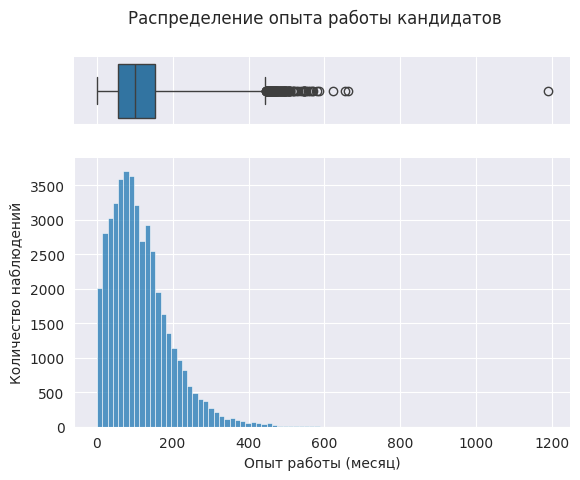

Мода опыта работы: 81.0 месяц
Другие статистики опыта работы:
count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64
Опыт работы большинства (1std от среднего) лежит в интервале между 35 и 193 месяцами


In [14]:
# ваш код здесь
# Создадим визуализацию
fig, (ax_box, ax_hist) = plt.subplots(
    2,
    sharex=True,
    gridspec_kw={'height_ratios': (0.20, 0.80)},
)
sns.boxplot(x=df['Опыт работы (месяц)'], ax=ax_box, whis=3)
sns.histplot(x=df['Опыт работы (месяц)'], bins=85, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.ylabel('Количество наблюдений')
fig.suptitle('Распределение опыта работы кандидатов')
plt.show()

# Посчитаем моду опыта работы
age_mode = df['Опыт работы (месяц)'].mode()[0]
print(f'Мода опыта работы: {age_mode} месяц')

print('Другие статистики опыта работы:', df['Опыт работы (месяц)'].describe(), sep='\n')

# Посчитаем интервал, в котором лежит опыт работы большинства соискателей
experience_std = df['Опыт работы (месяц)'].std()
mean_experience = df['Опыт работы (месяц)'].mean()
print(f'Опыт работы большинства (1std от среднего) лежит в интервале между {round(mean_experience - experience_std)} и {round(mean_experience + experience_std)} месяцами')

Основные статистики возраста кандидатов показаны в выводе выше под диаграммой. Мода 81, среднее примерно 114 и т.п. Значения разумные, ожидаемые. Предельные значения: 1 месяц (минимум) и  1188 месяцев (максимум). Аномальным выглядит максимум (1188 месяцев), чтобы набрать такой опыт пришлось бы работать более 80 лет.
Основные выводы по диаграмме:
- Распределение, которое можем видеть на гистограмме ожидаемо напоминает распределение Пуассона. Такая его форма хорошо объясняется сутью явления (при выходе на работу у кандидатов опыт 0).
- На коробчатой диаграмме хорошо виден явный выброс - слишком большой опыт около 80ти лет работы.
- Другие значения, кроме вышеупомянутого, выходящие за "усы коробчатой диаграммы", здесь вряд ли можно считать аномалиями, поскольку эти значения опыта вполне соответствуют возможному опыту пенсионеров, которые тоже могут искать работу.
- Визуально по гистограмме можем определить, что опыт почти всех кандидатов лежит между 0 и 400 месяцами.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


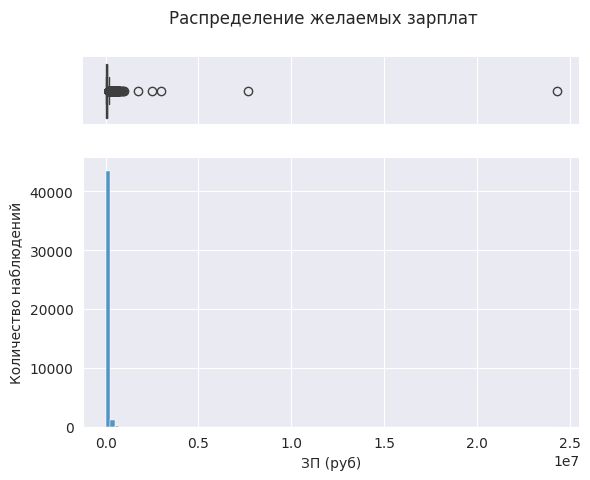

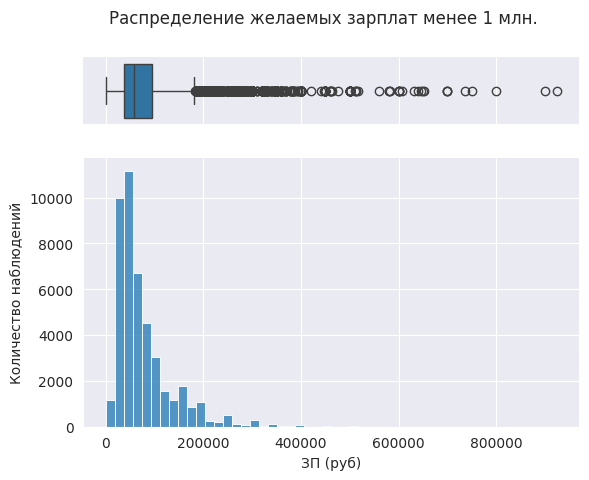

Мода зарплаты: 50000.0 руб.
Другие статистики зарплаты:
count    4.474400e+04
mean     7.653354e+04
std      1.359315e+05
min      1.000000e+00
25%      3.708220e+04
50%      5.901900e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64
Зарплата большинства (1std от средней) лежит в интервале между 1.0 и 212465 руб.
Аномальные значения заработной платы за пределами IQR плюс минус 1.5IQR: 2781


In [15]:
# ваш код здесь
# Создадим визуализацию
fig, (ax_box, ax_hist) = plt.subplots(
    2,
    sharex=True,
    gridspec_kw={'height_ratios': (0.20, 0.80)},
)
sns.boxplot(x=df['ЗП (руб)'], ax=ax_box)
sns.histplot(x=df['ЗП (руб)'], bins=100, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.ylabel('Количество наблюдений')
fig.suptitle('Распределение желаемых зарплат')

# Построим так же диаграмму для зарплат менее миллиона
fig, (ax_box, ax_hist) = plt.subplots(
    2,
    sharex=True,
    gridspec_kw={'height_ratios': (0.20, 0.80)},
)
sns.boxplot(x=df[df['ЗП (руб)'] < 1e6]['ЗП (руб)'], ax=ax_box)
sns.histplot(x=df[df['ЗП (руб)'] < 1e6]['ЗП (руб)'], bins=50, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.ylabel('Количество наблюдений')
fig.suptitle('Распределение желаемых зарплат менее 1 млн.')

plt.show()

# Посчитаем моду зарплаты
wage_mode = df['ЗП (руб)'].mode()[0]
print(f'Мода зарплаты: {wage_mode} руб.')

print('Другие статистики зарплаты:', df['ЗП (руб)'].describe(), sep='\n')

# Посчитаем интервал, в котором лежит зарплата большинства соискателей
wage_std = df['ЗП (руб)'].std()
min_wage = df['ЗП (руб)'].min()
mean_wage = df['ЗП (руб)'].mean()
print(f'Зарплата большинства (1std от средней) лежит в интервале между {max(min_wage, round(mean_wage - wage_std))} и {round(mean_wage + wage_std)} руб.')

quartile1_wage = df['ЗП (руб)'].quantile(0.25)
quartile3_wage = df['ЗП (руб)'].quantile(0.75)
iqr_wage = quartile3_wage - quartile1_wage
outliers_wage = df[(df['ЗП (руб)'] < (quartile1_wage - 1.5 * iqr_wage)) | (df['ЗП (руб)'] > (quartile3_wage + 1.5 * iqr_wage))]
print('Аномальные значения заработной платы за пределами IQR плюс минус 1.5IQR:', len(outliers_wage))

Наиболее часто встречающаяся зарплата (мода) равна 50 тыс. руб.
Предельные значения признака "ЗП (руб)": 1 руб. (минимум) и примерно 24 млн. руб. (максимум).
Визуально по гистограмме видно, что заработная плата подавляющего большинства соискателей лежит в интервале между 0 и 200000 тысячами рублей.  
На первой диаграмме хорошо видна аномалия - зарплата около 24 млн. руб.  
Минимальную зарплату в 1 руб. тоже можно считать аномалией (ниже минимального размера оплаты труда, разрешённого по закону).
За пределами "усиков" коробчатой диаграммы лежит 2781 значений зарплаты.   

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

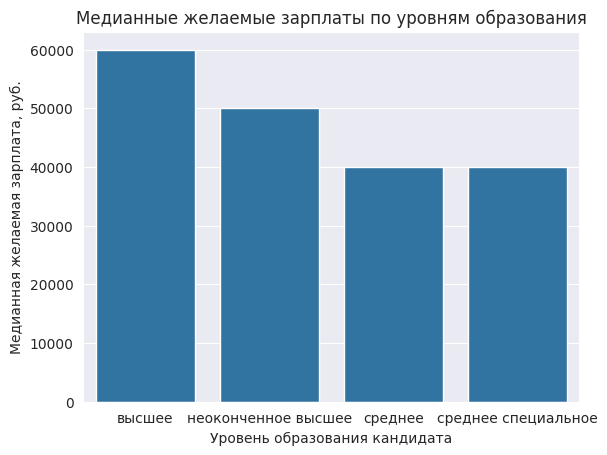

In [16]:
# ваш код здесь
# Отфильтруем зарплаты до миллиона
df_wage_lt_1mil = df[df['ЗП (руб)'] < 1e6]
# Рассортируем уровни образования по медианной зарплате
order = (
    df_wage_lt_1mil.groupby(['Образование'])['ЗП (руб)'].aggregate('median')
    .reset_index().sort_values('ЗП (руб)', ascending=False)['Образование'])
# Построим столбчатую диаграмму
sns.barplot(
    x='Образование',
    y='ЗП (руб)',
    data=df_wage_lt_1mil,
    estimator='median',
    errorbar=None,
    order=order,
)
plt.xlabel('Уровень образования кандидата')
plt.ylabel('Медианная желаемая зарплата, руб.')
plt.title('Медианные желаемые зарплаты по уровням образования')

plt.show()

*Выводы по диаграмме:*
- На диаграмме хорошо видно, что наибольшая медианная желаемая зарплата соответствует наивысшему уровню образования, существенно меньший уровень желаемой зарплаты соответствует неоконченному высшему образованию, и явно ещё более меньшие медианные желаемые зарплаты - двум наиболее низким уровням образования.  
- Признак образования, соответственно, является важным для прогнозирования желаемого уровня зарплаты.  

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

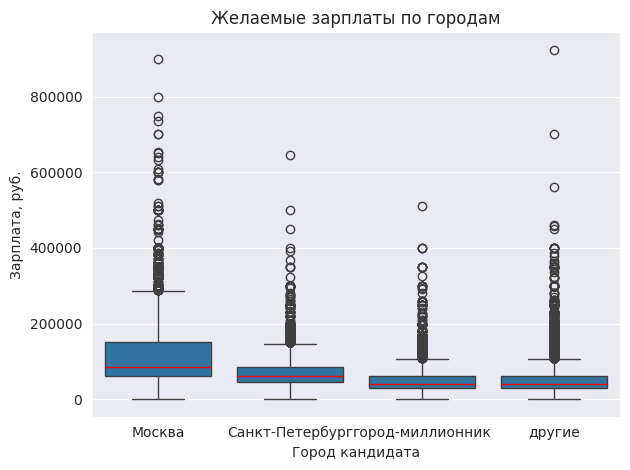

In [17]:
# ваш код здесь
# Рассортируем города по медианной зарплате
order = (
    df_wage_lt_1mil.groupby(['Город'])['ЗП (руб)'].aggregate('median')
    .reset_index().sort_values('ЗП (руб)', ascending=False)['Город'])

# Построим коробчатые диаграммы, удобные для сравнения сразу
# нескольких распределений между собой
sns.boxplot(
    x='Город',
    y='ЗП (руб)',
    data=df_wage_lt_1mil,
    order=order,
    medianprops={'color': 'r'},
)
plt.xlabel('Город кандидата')
plt.ylabel('Зарплата, руб.')
plt.title('Желаемые зарплаты по городам')

plt.tight_layout()
plt.show()

*Выводы по диаграмме:*
- На диаграмме хорошо видно, что большим зарплатам соответствует Москве, существенно меньшим Санкт-Петербург и явно ещё существенно меньшим желаемым зарплатам соответствуют прочие города. То же можно сказать и о медианных зарплатах. В категории "другие" видна наибольшая зарплата, но поскольку это единичный случай, на общие выводы это не влияет.  
- Признак города, соответственно, является важным для прогнозирования желаемого уровня зарплаты.  

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

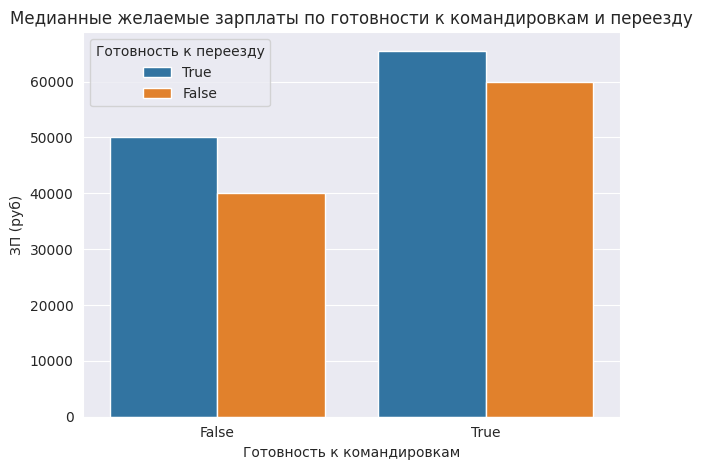

Медианная желаемая зарплата соискателей, готовых и к переезду и к командировкам: 66 тыс. руб.


In [18]:
# ваш код здесь
# Рассортируем готовность к переезду по медианной зарплате
hue_order = (
    df_wage_lt_1mil.groupby(['Готовность к переезду'])['ЗП (руб)'].aggregate('median')
    .reset_index().sort_values('ЗП (руб)', ascending=False)['Готовность к переезду'])

# Построим многоуровневую столбчатую диаграмму
sns.barplot(
    data=df_wage_lt_1mil,
    estimator='median',
    x='Готовность к командировкам',
    y='ЗП (руб)',
    hue='Готовность к переезду',
    errorbar=None,
    dodge=False,
    hue_order=hue_order,
)
plt.title('Медианные желаемые зарплаты по готовности к командировкам и переезду')

plt.tight_layout()
plt.show()

trips_and_move_ready_median_wage = df_wage_lt_1mil[
    df_wage_lt_1mil['Готовность к переезду'] 
    & df_wage_lt_1mil['Готовность к командировкам']
]['ЗП (руб)'].median()
trips_and_move_ready_median_wage = round(trips_and_move_ready_median_wage / 1000)
print(f'Медианная желаемая зарплата соискателей, готовых и к переезду и к командировкам: {trips_and_move_ready_median_wage} тыс. руб.')

*Выводы по диаграмме:*
- На диаграмме хорошо видно, что готовность и к командировкам и к переезду явно соответствует более высокому уровню медианной желаемой зарплаты кандидата. При этом, изменение готовности к командировкам соответствует более сильному изменению зарплаты.
- Оба признака, соответственно, представляются важными для прогнозирования уровня желаемой зарплаты кандидата, при этом, признак готовности к командировкам выглядит более значимым.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

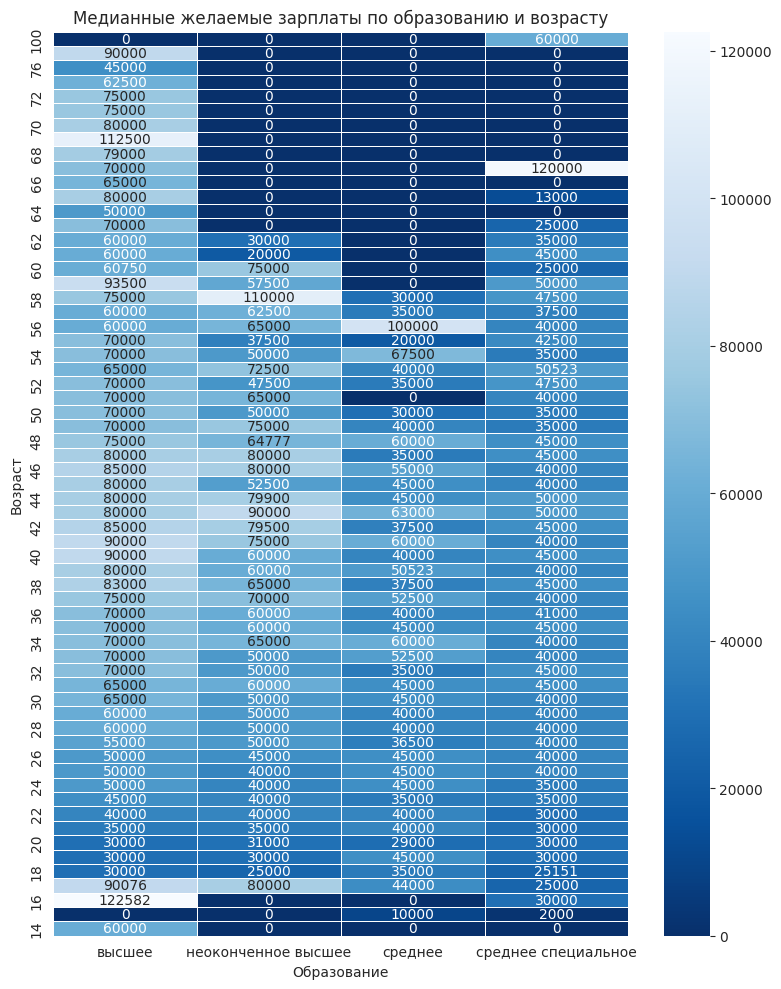

In [19]:
# ваш код здесь
# Построим сводную таблицу
pivot_table = df_wage_lt_1mil.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0,
)

# Выведем тепловую карту
fig, ax = plt.subplots(figsize=(8, 10))
sns.heatmap(
    pivot_table.T,
    ax=ax, 
    annot=True,
    cmap='Blues_r',
    fmt='.0f',
    linewidths=0.5,
).invert_yaxis()

plt.title('Медианные желаемые зарплаты по образованию и возрасту')
plt.tight_layout()
plt.show()

*Выводы по диаграмме:*
- С увеличением возраста наблюдается увеличение медианной желаемой зарплаты (видимо, большему опыту, который наверняка характерен для более высокого возраста, соответствует более высокая желаемая медианная зарплата), но при достижении определённого пожилого возраста, она начинает наоборот снижаться, что ожидаемо, поскольку работать после определённого возраста начинает становиться всё тяжелее.
- Для кандидатов с высшим образованием, судя по диаграмме, характерна более длительная карьера (есть данные по зарплатам для более старших возрастов).
- Отличающаяся по окраске (в сторону более высоких зарплат) область с более высокими уровнями образования говорит о том, что им соответствуют более высокие желаемые медианные зарплаты.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

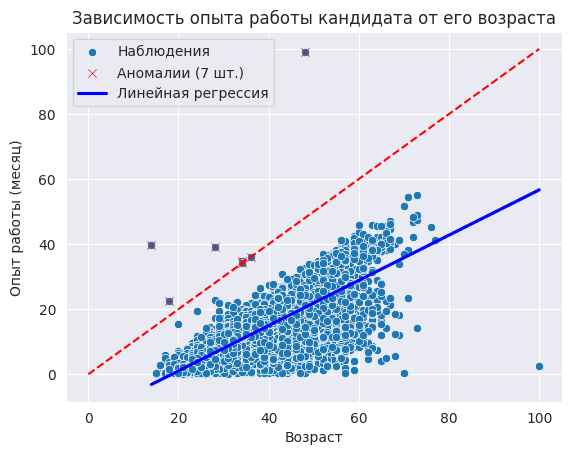

In [20]:
# ваш код здесь
# Переведём опыт работы в годы
df_experience_years = df['Опыт работы (месяц)'] / 12

# Построим диаграмму рассеяния
sns.scatterplot(data=df, x='Возраст', y=df_experience_years)

# Найдем и отметим аномалии на графике
anomalous_experience_df = df[df_experience_years >= df['Возраст']]
sns.scatterplot(
    data=anomalous_experience_df,
    x='Возраст',
    y=df_experience_years,
    color='r',
    marker='x',
)
sns.regplot(data=df, x='Возраст', y=df_experience_years, scatter=False, color='b')

# Построим прямую, проходящую через точки (0, 0) и (100, 100)
plt.plot((0, 100), (0, 100), color='r', linestyle='--')

plt.title('Зависимость опыта работы кандидата от его возраста')
plt.legend([
    'Наблюдения',
    f'Аномалии ({len(anomalous_experience_df)} шт.)',
    'Линейная регрессия',
])
plt.show()

*Выводы по диаграмме:*
- Наблюдается положительная корреляция между возрастом и опытом работы кандидата
- Ожидаемо присутствует некоторый разрыв между нашей "линией аномалий" и большинством наблюдений (детский возраст кандидатов, когда не копился опыт)
- Имеется несколько явных аномалий (7 наблюдений), - когда опыт равен или превышает возраст кандидата.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


Пол                     Ж      М
Образование                     
высшее               6898  26961
неоконченное высшее   664   3892
среднее                79    480
среднее специальное   891   4873


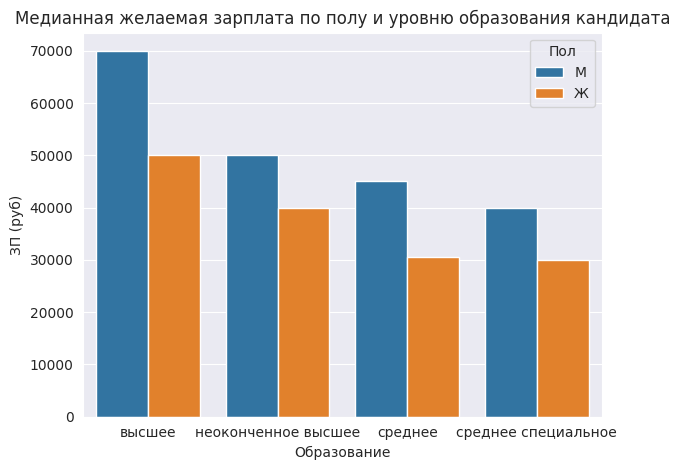

In [21]:
# ваш код здесь

# Давайте посмотрим, как пол кандидата влияет на его зарплатные ожидания
# и сделаем это в разрезе ещё и его уровня образования

# Выведем сводные данные, чтобы убедиться, что имеется достаточное количество
# наблюдений по данным срезам, чтобы дальнейшие выводы имели некоторую значимость
pivot_table = df_wage_lt_1mil.pivot_table(
    index='Образование',
    columns='Пол',
    values='ЗП (руб)',
    aggfunc='count',
    fill_value=0,
)
print(pivot_table)

# Рассортируем уровни образования по медианной желаемой зарплате
order = (
    df.groupby(['Образование'])['ЗП (руб)'].aggregate('median')
    .reset_index().sort_values('ЗП (руб)', ascending=False)['Образование'])

# Рассортируем пола по медианной желаемой зарплате
hue_order = (
    df.groupby(['Пол'])['ЗП (руб)'].aggregate('median')
    .reset_index().sort_values('ЗП (руб)', ascending=False)['Пол'])

# Построим многоуровневую столбчатую диаграмму
sns.barplot(
    data=df,
    estimator='median',
    x='Образование',
    y='ЗП (руб)',
    hue='Пол',
    errorbar=None,
    dodge=False,
    order=order,
    hue_order=hue_order,
)
plt.title('Медианная желаемая зарплата по полу и уровню образования кандидата')

plt.tight_layout()
plt.show()

*Выводы по диаграмме:*
- Существенные по высоте цветные "шапки" тут явным образом демонстрируют существенно более высокие медианные зарплатные ожидания мужчин по сравнению с женщинами для всех уровней образования. 
- Видно, что каждый следующий уровень образования соответствует явно более высокой медианной желаемой зарплате для мужчин, в то время как для женщин получение среднего образования практически не влияет на повышение медианной желаемой зарплаты. Но тут стоит также отметить, что по нашей сводной таблице, выведенной над графиком, видно, что по женщинам со средним образованием наблюдений вообще у нас не много, хотя и не слишком мало. Так что, данный вывод стоит проверить по большему количеству данных.
- Переход между неоконченным высшим и высшим образованием соответствует самому большому скачку в медианной желаемой зарплате у мужчин, радикально превышающему подобные увеличения от предыдущих повышений уровней образования, а для женщин этот уровень не обеспечивает столь значительного скачка по сравнению с предыдущим.  

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [22]:
# ваш код здесь
duplicates = df[df.duplicated()]

print(f'Количество полных дубликатов в данных:', len(duplicates))

df.drop_duplicates(inplace=True)

Количество полных дубликатов в данных: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [23]:
# ваш код здесь
print('Число пропусков в столбцах:')
df.isna().sum()

Число пропусков в столбцах:


Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
волонтерство                         0
полная занятость                     0
проектная работа                     0
стажировка                           0
частичная занятость                  0
вахтовый метод                       0
гибкий график                        0
полный день                          0
сменный график                       0
удаленная работа                     0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [24]:
# ваш код здесь
# Удалим строки, где есть пропуск в столбцах с местом работы и должностью
df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Пропуски в столбце с опытом работы заполним медианными значениями
median_experience = df['Опыт работы (месяц)'].median()
df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(median_experience)

mean_experience = round(df['Опыт работы (месяц)'].mean())
print(f"Средний опыт работы (месяц) после заполнения пропусков': {mean_experience}")

Средний опыт работы (месяц) после заполнения пропусков': 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [25]:
# ваш код здесь
anomalous_wage_df = df[(df['ЗП (руб)'] > 1000000) | (df['ЗП (руб)'] < 1000)]
print(f'Найдено выбрасов с аномальной зарплатой: ', len(anomalous_wage_df))
df.drop(anomalous_wage_df.index, inplace=True)

Найдено выбрасов с аномальной зарплатой:  89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [26]:
# ваш код здесь
anomalous_experience_df = df[df['Опыт работы (месяц)'] / 12 >= df['Возраст']]
print(f'Найдено выбрасов с аномальным опытом работы: ', len(anomalous_experience_df))
df.drop(anomalous_experience_df.index, inplace=True)

Найдено выбрасов с аномальным опытом работы:  7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

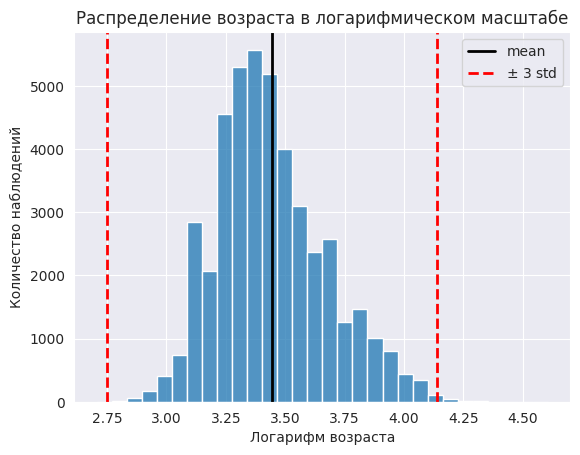

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,False,False,False,True,False,True,False,True,True,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,другие,...,True,False,False,False,False,False,True,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,True,False,True,True,False,True,60000.0


In [27]:
# ваш код здесь
# Строим гистограмму в логарифмическом масштабе
log_age = np.log(df['Возраст'])
histplot = sns.histplot(log_age, bins=30)

# Выведем на диаграмме линию среднего
log_age_mean = log_age.mean()
histplot.axvline(log_age_mean, color='k', lw=2)

# Выведем на диаграмме линии 3 сигм
log_age_std = log_age.std()
lower_bound = log_age_mean - 3 * log_age_std
upper_bound = log_age_mean + 3 * log_age_std
histplot.axvline(
    lower_bound,
    color='r',
    linestyle='--', 
    lw=2,
)
histplot.axvline(
    upper_bound,
    color='r', 
    linestyle='--',
    lw=2,
)

plt.xlabel('Логарифм возраста')
plt.ylabel('Количество наблюдений')
plt.title('Распределение возраста в логарифмическом масштабе')
plt.legend(['mean', '$\pm$ 3 std'])

plt.show()

# Посчитаем z-отклонения для логарифмических значений
z_scores = (log_age - log_age_mean) / log_age_std

# Найдём выбросы в соответствии с условием задачи
outliers = np.where((z_scores < -3) | (z_scores > 4))[0]
age_outliers = df.iloc[outliers]

# Удалим выбросы
df.drop(index=age_outliers.index, inplace=True)

# Выведем таблицу с выбросами
display(age_outliers)

На гистограмме видно, что логарифмическое распределение смещено влево, следовательно, имеется много возрастных кандидатов. Мы разумно добавили 4 стандартное отклонение справа для метода z-score.
Далее из таблицы мы можем увидеть, что с помощью метода z-score обнаружилось 3 выброса (два кандидата с указанным возрастом 15 лет и один 100 лет).